# Video Streams
## Computer Vision and Image Processing - Lab Session 5
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Pierluigi Zama Ramirez, pierluigi.zama@unibo.it

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Import additional library to properply play videos on jupyter notebook
from IPython.display import clear_output

A video is a temporal sequence of images, namely **Frames**.

<img src="LabSession5Images/Eadward-Muybridge-Horse-in-Motion.jpg" width="512">

The number of frame in 1 second of video is called **frame rate**

In a video we can elaborate each frame separately with processing algorithms or we can elaborate only keyframe of the original video and the missing ones are reconstructed by interpolation.

## Load a Video from File

To load a video in OpenCV you need to create a VideoCapture object. Its argument can be either the device index or the name of a video file.
A device index is just the number to specify which camera. Normally one camera will be connected (as in my case). So I simply pass 0 (or -1).
You can select the second camera by passing 1 and so on. After that, you can capture frame-by-frame. But at the end, don't forget to release the capture.

Let us now try to load a video from a file:

In [31]:
# Working only if a camera is available.
cap = cv2.VideoCapture('LabSession5Images/video.mp4')

Sometimes, cap may not have initialized the capture. In that case, this code shows an error. You can check whether it is initialized or not by the method cap.isOpened(). If it is True, OK. Otherwise open it using cap.open().

In case the capture is open we can get a frame of the capture in the following way:

In [32]:
if cap.isOpened():
    ret, frame = cap.read()

print(ret, frame.shape)

True (720, 960, 3)


Where _ret_ is a boolean variable which is True if we read the frame correctly and _frame_ is an image. Let us visualize the captured frame:

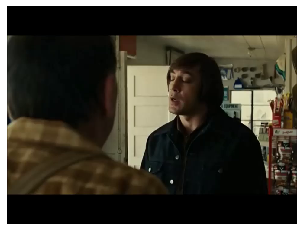

In [34]:
if ret and not frame is None:
    # Disabling matplotlib axis for better visualization
    plt.axis('off')
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()

You can also access some of the features of this video using cap.get(propId) method where propId is a number from 0 to 18. Each number denotes a property of the video (if it is applicable to that video). Some of these values can be modified using cap.set(propId, value).

For example to get the width and height of the frame:

In [36]:
print("Width: " , cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print("Height: ", cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

Height:  960.0
Width:  720.0


My video is of resolution 720x960.

If we want to play our video in **jupyter notebook** we can do the following (a bit slow because of jupyter not ideal for playing videos):

In [44]:
# Put the code in try-except statements catch the keyboard exception and release the camera device and 
# continue with the rest of code.
def play_video(video_path):
    cap = cv2.VideoCapture(video_path)
    # Try-except statement to manage exceptions
    try:
        while(True):
            # Capture frame
            ret, frame = cap.read()
            if not ret and not frame is None:
                # Release the Video if ret is false
                cap.release()
                print("Released Video Resource")
                # Break exit the for loops
                break
            
            # Display the frame
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            plt.axis('off')
            plt.title("Input Stream")
            plt.imshow(frame)
            plt.show()
            
            # Clear cell output when new frame is available
            clear_output(wait=True)
    except KeyboardInterrupt:
        # If we press top release the video
        cap.release()
        print("Released Video Resource")

play_video('LabSession5Images/video.mp4')

Released Video Resource


__N.B__: It can happen that we want to play a video from a non-jupyter enviroment. In that case we can modify the above code as follows:

```python
def play_video(video_path):
    cap = cv2.VideoCapture(video_path)
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            # Release the Video if ret is false
            cap.release()
            print("Released Video Resource")
            break

        # !!! DISPLAYING CHANGE RESPECT TO JUPYTER VERSION !!!
        # Displaying with OpenCV (Not working in Jupyter)
        cv2.imshow('frame', frame)
        # Stop playing when entered 'q' from keyboard
        if cv.waitKey(1) == ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()
```

## Load a Video from a Camera (Only if Camera Available)
If we want to load a video from a camera we can open our video capture giving a device id as input.

In [45]:
cap = cv2.VideoCapture(0)

print("Width: " , cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print("Height: ", cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

Height:  640.0
Width:  480.0


Resolution is 640x480 by default. We can change it using cap.set:

In [50]:
ret = cap.set(cv2.CAP_PROP_FRAME_WIDTH,960) 
ret = cap.set(cv2.CAP_PROP_FRAME_HEIGHT,720)

Now frames have the desired resolution:

In [51]:
if cap.isOpened():
    ret, frame = cap.read()

print(ret, frame.shape)

False (720, 960, 3)


Let us try to reproduce our webcam stream:

In [52]:
play_video(0)

Released Video Resource


## Saving a Video

To save a video on a file we need to create a VideoWriter object specifying:
* **Filename** (eg: output.avi)
* **FourCC code**: 4-byte code used to specify the video codec. The list of available codes can be found in fourcc.org. It is platform dependent. In Windows DIVX is the preferred choice while on linux we have several standards such as DIVX, XVID, X264 etc..
* **FPS**: number of frames per second
* **Frame size**
* Flag **isColor**: If it is True, the encoder expect color frame, otherwise it works with grayscale frame.

Let us try to load and save a video with each frame flipped along vertical axis. Load the original video:

In [82]:
# Loading Video
cap = cv2.VideoCapture("LabSession5Images/video.mp4")

# Getting original video params
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

Initialize the VideoWriter based on the parameters of the original video:

In [83]:
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
# N.B. we need to specify the correct width and height of the frames otherwise we will not be able to reproduce the video
out = cv2.VideoWriter('output.avi', fourcc, fps, (w,  h))

Flip and save frame by frame the video:

In [84]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret or frame is None:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = np.flip(frame, axis=0)
    # write the flipped frame
    out.write(frame)

Can't receive frame (stream end?). Exiting ...


Release the resources:

In [85]:
# Release everything if job is finished
cap.release()
out.release()

Let us visualize the flipped video:

In [86]:
play_video('output.avi')

Released Video Resource


## Change Detection Algorithms

Change Detection: detection of “meaningful” changes occurring in a scene by processing of images captured at different time instants.
* Input: two (at least!) or more images of the monitored scene.
* Output: binary image, called "change mask“: each pixel is assigned one between two values (labels) c, u ("changed",  unchanged"): c if meaningful changes occur at the pixel, u otherwise (commonly, c = 255, u = 0 → white/ black).

<img src="LabSession5Images/ChangeDetection.png" width="512">

Example of Applications are Traffic monitoring, Video compression, Security etc ..

The following Change Detection Algorithms we will talk later are based on the following **working assumptions**:
* **Static camera**
* **High frame rate**

###  Two Frame Difference
We define as $F_t(i,j) \in R^2$ our grayscale frame and as $F_t(i,j) \in R^n$ our colored frame where $n$ are the number of channels, $i,j$ are the pixel coordinates and $t$ the temporal position in the video sequence. We define $D(i,j) = d(F_t(i,j), F_{t-l}(i.j))$ as a distance function between two different frames.

Typical distance functions are the Holder norms of the difference vector:



### Three Frame Difference

### Background Subtraction